# Angular integration 

### import packages, scripts and files

Packages that will be used. You may need to install some packages by: pip install 'package name'

In [35]:
# -- import packages
import matplotlib.pyplot as plt
import numpy as np
import sys
import tifffile as tf

sys.path.insert(0, '../scripts/')
from integrators import*
from utilities import *
from corrections import *

Load files

In [36]:
filename = '../data/CeO2_test_0p1s10f-00032.tif'
CeO2 = np.array(tf.imread(filename))

### parameters

Collect all parameters and constants here

In [37]:
# beam center (You can estimate this with fit2D or with the ring fitting script)
cx,cy = 1037,1031 

# ploting parameters
dx,dy = 150,150
vmin,vmax = 0,5e5

# angular integration parameters
n_bins = 3500           # number of bins
min_x,max_x = 0,760     #n_bins
mask_thr = 0            # threshold limit for integrator
qmax = 2.               # for the first peak 

### Angular integration

In [38]:
# angular intergation
qbin,Iq = angular_average(CeO2, (cx,cy),None,threshold=mask_thr, nx=n_bins,  min_x=min_x, max_x=max_x)

# Q calibration 
Imax = max(Iq)
qbin_max = qbin[Iq==Imax]
q = qbin*(qmax/qbin_max)

### Plot data

Plot 2D data

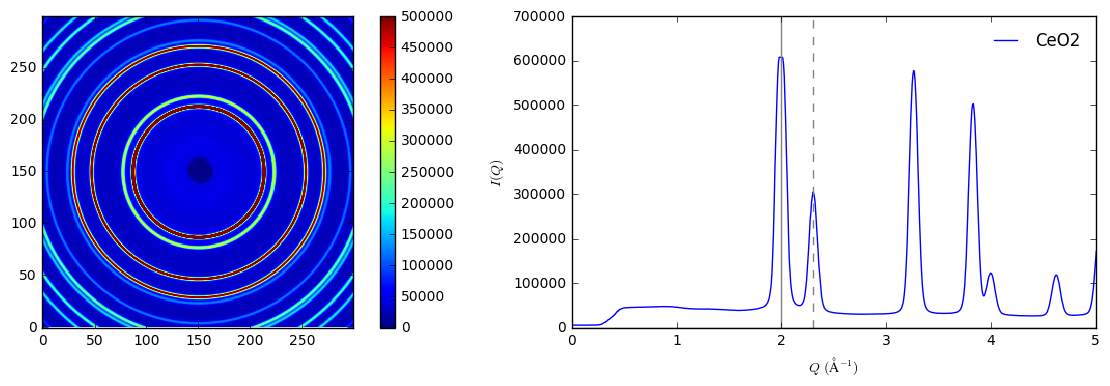

In [33]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.imshow(CeO2[cx-dx:cx+dx,cy-dy:cy+dy],origin='lower',interpolation='none',vmax =vmax,vmin=vmin)
plt.colorbar()

plt.subplot(1,2,2)
plt.plot(q,Iq,'b-',label='CeO2')
plt.axvline(x=qmax,c='gray',ls='-')
plt.axvline(x=2.3,c='gray',ls='--')
plt.axhline(y=0,c='gray')
plt.ylabel(r'$I(Q)$')
plt.xlabel(r'$Q$ $\rm(\AA^{-1})$')
plt.xlim([0,5])
plt.legend(frameon=False)

plt.tight_layout()
plt.show()